For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

* Has the network latency gone up since we switched internet service providers?
* Is the website redesign any good?
* Is our television ad driving more sales?

1. Has the network latency gone up since we switched internet service providers?
Null Hypothesis: Switching internet service providers made no difference in network latency. 
Alternative Hypothesis: Switching internet service providers caused the network latency to increase.
True Positive: Network latency increased after switching internet service providers.
True Negative: Network latency stayed the same after switching internet service providers.
Type 1 Error: Your test shows a change in network latency where there is none.
Type 2 Error: Your test didn't show a change in network latency where there is change.

2. Did the website redesign lead to more visits?
Null Hypothesis: The website redesign made no difference in page visitors.
Alternative Hypothesis: The website redesign leads to more page visitors.
True Postive: The website redesign lead to a 40% increase in page visitors.
True Negative: The old website is just as effective as the redesign.
Type 1 Error: Your test showed an increase in page visits where there was no change.
Type 2 Error: Your test showed no increase in page visits where there was a change.

3. Did the television ad cause an increase in sales?
Null Hypothesis: The television ad did not have an effect on sales.
Alternative Hypothesis: The television ad caused an increase in sales.
True Postive: The television ad caused an increase of sales by 20%.
True Negative: Your test showed the television ad had no effect on sales.
Type 1 Error: Your test showed a change in sales where there was none.
Type 2 Error: Your test didn't show a change in sales where there was a change.

In [165]:
from math import sqrt
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

from pydataset import data

alpha = 0.05

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [35]:
# scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

In [3]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)

In [4]:
t, p, alpha

(-2.7091418459143854, 0.00811206270346016, 0.05)

<function pydataset.data(item=None, show_doc=False)>

In [5]:
from pydataset import data
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


#### 2. Load the mpg dataset and use it to answer the following questions:

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
#### Are compact cars more fuel-efficient than the average car?
#### Do manual cars get better gas mileage than automatic cars?

In [6]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy)/2

In [7]:
mpg.dtypes

manufacturer        object
model               object
displ              float64
year                 int64
cyl                  int64
trans               object
drv                 object
cty                  int64
hwy                  int64
fl                  object
class               object
average_mileage    float64
dtype: object

In [8]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


#### Part 1

In [131]:
avg_mileage_1999 = mpg[mpg.year == 1999].average_mileage
avg_mileage_1999.dtypes

dtype('float64')

In [10]:
avg_mileage_2008 = mpg[mpg.year == 2008].average_mileage

In [11]:
avg_mileage_1999.var(), avg_mileage_2008.var()

(27.122605363984682, 24.097480106100797)

In [12]:
t, p = stats.ttest_ind(avg_mileage_1999, avg_mileage_2008, equal_var=False)

In [37]:
t, p, alpha

(4.443514012903071, 4.0940449915016345e-99, 0.05)

We fail to reject the null hypothesis.

#### Part 2

In [14]:
compact_mileage = mpg[mpg['class'] == 'compact'].average_mileage

In [15]:
midsize_mileage = mpg[mpg['class'] == 'midsize'].average_mileage

In [16]:
compact_mileage.var(), midsize_mileage.var()

(12.442876965772433, 3.8118902439024374)

In [17]:
t, p = stats.ttest_ind(compact_mileage, midsize_mileage, equal_var=False)

In [18]:
t, p/2, alpha

(1.9869420198494934, 0.025326829695052448, 0.05)

We reject the null hypothesis.

#### Part 3

In [19]:
auto_mileage = mpg[mpg.trans.str.contains('auto')].average_mileage

In [20]:
manual_mileage = mpg[mpg.trans.str.contains('manual')].average_mileage

In [21]:
auto_mileage.var(), manual_mileage.var()

(21.942777233382337, 26.635167464114826)

In [22]:
t, p = stats.ttest_ind(manual_mileage, auto_mileage, equal_var=False)

In [23]:
t, p, alpha

(4.443514012903071, 1.795224899991793e-05, 0.05)

We reject the null hypothesis

In [105]:
telco = pd.read_csv('telco_churn.csv')
telco = telco.dropna()

In [106]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [75]:
tenure = telco.tenure
mon_charge = telco['MonthlyCharges']

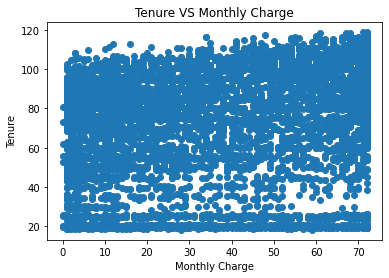

In [76]:
plt.scatter(tenure, mon_charge)
plt.title('Tenure VS Monthly Charge')
plt.xlabel('Monthly Charge')
plt.ylabel('Tenure')
plt.show()

In [77]:
corr, p = stats.pearsonr(mon_charge, tenure)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

In [ ]:
# Upon initial inspection, the data does not show a correlation between tenure and monthly charges.

In [120]:
telco = telco[telco.TotalCharges != ' ']

In [121]:
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

In [122]:
total_charges = telco.TotalCharges

In [123]:
tenure = telco.tenure

$H_0$ = There is no difference in total_charges when compared to tenure.

$H_a$ = Total_charges change when compared to tenure.

In [127]:
corr, p = stats.pearsonr(total_charges, tenure)
corr, p

(0.825880460933202, 0.0)

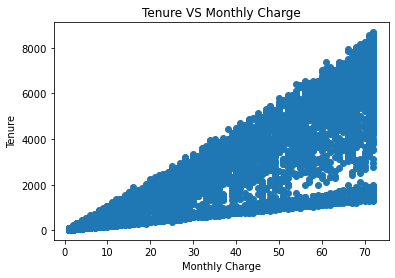

In [132]:
plt.scatter(tenure, total_charges)
plt.title('Tenure VS Monthly Charge')
plt.xlabel('Monthly Charge')
plt.ylabel('Tenure')
plt.show()

In [133]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [136]:
no_phone_service = telco[telco.PhoneService == 'No'].InternetService

In [137]:
phone_service = 

0       DSL
3       DSL
7       DSL
20      DSL
27      DSL
       ... 
7003    DSL
7007    DSL
7029    DSL
7036    DSL
7040    DSL
Name: InternetService, Length: 680, dtype: object

In [166]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [ ]:
# Try this for part 3
df[df.PhoneService == ‘Yes’]
df[df.PhoneService == ‘No’]
x_no_phone = df[df.PhoneService == ‘No’].tenure
y_no_phone = df[df.PhoneService == ‘No’].monthy_charges

## Chi$^2$ Exercises

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [140]:
# Create a list of names for the rows
index = ['Uses a Macbook','Doesn\'t use a Macbook']
# Create a list of names for the columns
columns = ['Codeup Student', 'Not a Codeup Student']
# Create a pandas dataframe and store it in a variable 'observed'
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
# Count the total amount of observations based off the created datafram and store it in a variable 'n'
n = observed.values.sum()
# print dataframe
observed

,Codeup Student,Not a Codeup Student
Uses a Macbook,49,20
Doesn't use a Macbook,1,30


$H_0$: Owning a macbook and being a Codeup student are independent of each other.

$H_a$: Owning a Macbook and being a Codeup student are not indepenedent of each other.

In [141]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [143]:
a = 0.05
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [144]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We faile to reject the null hypothesis')

We reject the null hypothesis


### 2. Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [149]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [156]:
observed = pd.crosstab(mpg.cyl, mpg.trans)

In [158]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [162]:
observed

trans,auto(av),auto(l3),auto(l4),auto(l5),auto(l6),auto(s4),auto(s5),auto(s6),manual(m5),manual(m6)
cyl,,,,,,,,,,
4,2,2,24,6,0,2,1,4,33,7
5,0,0,0,0,0,0,0,2,2,0
6,3,0,29,16,2,0,1,5,18,5
8,0,0,30,17,4,1,1,5,5,7


$H_0$: The amount of cylinders an engine has is independent of the transmission type.

$H_a$: The amount of cylinders an engine has is not independent of the transmission type.

In [159]:
a = 0.05
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 2  2 24  6  0  2  1  4 33  7]
 [ 0  0  0  0  0  0  0  2  2  0]
 [ 3  0 29 16  2  0  1  5 18  5]
 [ 0  0 30 17  4  1  1  5  5  7]]
---
Expected

[[ 1  0 28 13  2  1  1  5 20  6]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 1  0 28 13  2  1  1  5 19  6]
 [ 1  0 24 11  1  0  0  4 17  5]]
---

chi^2 = 55.1275
p     = 0.0011


In [161]:
if p < a:
    print('We reject the null hypothesis')
else:
    print('We faile to reject the null hypothesis')

We reject the null hypothesis


### 3. Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

- Is an employee's gender independent of whether or not they are or have been a manager?

In [193]:
sql = '''
select employees.gender, departments.dept_name from departments
join dept_emp using (dept_no)
join employees using (emp_no)
where to_date > curdate() and
dept_name = 'Sales' or
dept_name = 'Marketing';
'''

In [194]:
employees_df = pd.read_sql(sql, url)

In [195]:
employees_df

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,M,Marketing
3,M,Marketing
4,F,Marketing
...,...,...
57907,F,Sales
57908,M,Sales
57909,M,Sales
57910,F,Sales


In [179]:
observed = pd.crosstab(employees_df.gender, employees_df.dept_name)

In [180]:
observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,9448,34258,7015,7075,8037,29549,8078,8439,20854
M,14132,51449,10331,10711,12174,43936,12039,12687,31391


$H_0$: Gender does